In [36]:
import pandas as pd
import nltk
import re
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter, OrderedDict
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hammam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
plt.style.use('seaborn')

C:\Users\Hammam\AppData\Local\Temp\ipykernel_17596\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [38]:
df = pd.read_csv('./data_news_retrieved.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   judul       45 non-null     object
 1   url         45 non-null     object
 2   kategori    45 non-null     object
 3   tanggal     45 non-null     object
 4   summary     45 non-null     object
 5   isi_berita  45 non-null     object
 6   penulis     45 non-null     object
dtypes: object(7)
memory usage: 2.6+ KB


None

,judul,url,kategori,tanggal,summary,isi_berita,penulis
0,120 Contoh Kalimat Aktif Intransitif Berdasark...,https://www.detik.com/sulsel/berita/d-6776696/...,detikSulsel,"Jumat, 16 Jun 2023 23:00 WIB",Kalimat aktif intransitif tidak membutuhkan ob...,Kalimat aktif intransitif merupakan kalimat ak...,Rasmilawanti Rustam
1,"Ada Sekolah di Solo Gelar Wisuda, Gibran: Rapo...",https://www.detik.com/jateng/berita/d-6777283/...,detikJateng,"Jumat, 16 Jun 2023 21:57 WIB",Fenomena sekolah menggelar acara wisuda juga m...,Maraknya sekolah jenjang TK-SMA yang menggelar...,Tara Wahyu NV
2,Dinas Pendidikan Akui Sejumlah Sekolah di Solo...,https://www.detik.com/jateng/berita/d-6777175/...,detikJateng,"Jumat, 16 Jun 2023 20:44 WIB",Dinas Pendidikan Kota Solo mengaku adanya seju...,Dinas Pendidikan Kota Solo mengaku adanya seju...,Tara Wahyu NV
3,"Fluktuasi Adalah: Pengertian, Jenis, dan Cara ...",https://finance.detik.com/berita-ekonomi-bisni...,detikFinance,"Jumat, 16 Jun 2023 20:35 WIB",Fluktuasi adalah suatu hal yang tidak stabil s...,Fluktuasi merupakan kata yang umum digunakan u...,ilham fikriansyah
4,Kata P2G soal Wisuda PAUD-SMA: Tak Berkorelasi...,https://www.detik.com/edu/sekolah/d-6777087/ka...,detikEdu,"Jumat, 16 Jun 2023 20:15 WIB",Kolom Instagram Mendikbud ramai keluhan ortu s...,Muncul keluhan dari warganet soal wisuda tingk...,Novia Aisyah


# Text Cleaning

In [39]:
data = df[df['kategori'] == 'detikEdu']['isi_berita'].tolist() 

In [40]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))

    text_lowered = text.lower()

    cleaned_text = ' '.join([word for word in text_lowered.split(' ') if word not in stop_words])

    return cleaned_text

In [41]:
cleaned_stopwords = []

for idx in range(len(data)):
    cleaned = remove_stopwords(data[idx])
    cleaned_stopwords.append(cleaned)

print('BEFORE')
print("="*50)
display(data[:1])
print("\nAFTER")
print("="*50)
display(cleaned_stopwords[:1])

BEFORE


['Muncul keluhan dari warganet soal wisuda tingkat PAUD hingga SMA. Sambatan ini bisa dilihat menyerbu kolom Instagram Menteri Pendidikan, Kebudayaan, Riset, dan Teknologi Nadiem Makarim beberapa waktu belakangan. Koordinator Nasional Perhimpunan Pendidikan dan Guru (P2G), Satriwan Salim mengatakan, tren wisuda untuk anak PAUD sampai SMA adalah hal yang relatif baru. Menurutnya, tren ini muncul sekitar 20 tahun terakhir. "Kami sih melihatnya ini mulai menjadi tren 20-an tahun terakhir, 20-an terakhir. Khusus untuk tingkat PAUD-TK wisuda bagi mereka ini relatif lebih muda lagi seiring banyaknya pendirian PAUD-PAUD dan TK-TK di Indonesia," ujarnya melalui sambungan WhatsApp dengan detikEdu (16/6/2023). "Nah, ini kira-kira 10 tahun terakhir fenomena banyaknya wisuda anak-anak di PAUD dan TK," lanjutnya. Namun, Satriwan menggarisbawahi, ada terlalu banyak kegiatan yang bersifat festival dan seremonial di sekolah-sekolah di Indonesia. "Festival-seremonial ini justru tidak berkorelasi dengan


AFTER


['muncul keluhan warganet wisuda tingkat paud sma. sambatan menyerbu kolom instagram menteri pendidikan, kebudayaan, riset, teknologi nadiem makarim belakangan. koordinator nasional perhimpunan pendidikan guru (p2g), satriwan salim mengatakan, tren wisuda anak paud sma relatif baru. menurutnya, tren muncul 20 terakhir. "kami sih tren 20-an terakhir, 20-an terakhir. khusus tingkat paud-tk wisuda relatif muda seiring banyaknya pendirian paud-paud tk-tk indonesia," sambungan whatsapp detikedu (16/6/2023). "nah, 10 fenomena banyaknya wisuda anak-anak paud tk," lanjutnya. namun, satriwan menggarisbawahi, kegiatan bersifat festival seremonial sekolah-sekolah indonesia. "festival-seremonial berkorelasi pengembangan kompetensi siswa, berkorelasi peningkatan prestasi siswa, tuh. beban finansial orang tua, anak," bebernya. memaparkan, anak-anak wisuda momen kelas ekonomi diantarkan mobil pribadi, angkutan umum, sepeda motor. "nah, menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka," d

In [42]:
def remove_punctuation_and_special_character(text):

    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [43]:
cleaned_punctuation_and_special_character = []

for idx in range (len(cleaned_stopwords)):
    cleaned = remove_punctuation_and_special_character(cleaned_stopwords[idx])
    cleaned_punctuation_and_special_character.append(cleaned)

print('Before')
print('='*50)
display(cleaned_stopwords[:1])
print('\nAfter')
print('='*50)
print(cleaned_punctuation_and_special_character[:1])

Before


['muncul keluhan warganet wisuda tingkat paud sma. sambatan menyerbu kolom instagram menteri pendidikan, kebudayaan, riset, teknologi nadiem makarim belakangan. koordinator nasional perhimpunan pendidikan guru (p2g), satriwan salim mengatakan, tren wisuda anak paud sma relatif baru. menurutnya, tren muncul 20 terakhir. "kami sih tren 20-an terakhir, 20-an terakhir. khusus tingkat paud-tk wisuda relatif muda seiring banyaknya pendirian paud-paud tk-tk indonesia," sambungan whatsapp detikedu (16/6/2023). "nah, 10 fenomena banyaknya wisuda anak-anak paud tk," lanjutnya. namun, satriwan menggarisbawahi, kegiatan bersifat festival seremonial sekolah-sekolah indonesia. "festival-seremonial berkorelasi pengembangan kompetensi siswa, berkorelasi peningkatan prestasi siswa, tuh. beban finansial orang tua, anak," bebernya. memaparkan, anak-anak wisuda momen kelas ekonomi diantarkan mobil pribadi, angkutan umum, sepeda motor. "nah, menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka," d


After
['muncul keluhan warganet wisuda tingkat paud sma sambatan menyerbu kolom instagram menteri pendidikan kebudayaan riset teknologi nadiem makarim belakangan koordinator nasional perhimpunan pendidikan guru p2g satriwan salim mengatakan tren wisuda anak paud sma relatif baru menurutnya tren muncul 20 terakhir kami sih tren 20an terakhir 20an terakhir khusus tingkat paudtk wisuda relatif muda seiring banyaknya pendirian paudpaud tktk indonesia sambungan whatsapp detikedu 1662023 nah 10 fenomena banyaknya wisuda anakanak paud tk lanjutnya namun satriwan menggarisbawahi kegiatan bersifat festival seremonial sekolahsekolah indonesia festivalseremonial berkorelasi pengembangan kompetensi siswa berkorelasi peningkatan prestasi siswa tuh beban finansial orang tua anak bebernya memaparkan anakanak wisuda momen kelas ekonomi diantarkan mobil pribadi angkutan umum sepeda motor nah menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka dia satriwan menekankan keberatan orang tua perih

# Text Normalization

In [44]:
def normalization_stemming(text):

    stemmer = StemmerFactory().create_stemmer()
    cleaned_text = stemmer.stem(text)
    return cleaned_text

In [45]:
normalized_stemming = []

for idx in range(len(cleaned_punctuation_and_special_character)):

    cleaned = normalization_stemming(cleaned_punctuation_and_special_character[idx])
    normalized_stemming.append(cleaned)

print("BEFORE")
print("="*50)
display(cleaned_punctuation_and_special_character[:1])
print("\nAFTER")
print("="*50)
display(normalized_stemming[:1])

BEFORE


['muncul keluhan warganet wisuda tingkat paud sma sambatan menyerbu kolom instagram menteri pendidikan kebudayaan riset teknologi nadiem makarim belakangan koordinator nasional perhimpunan pendidikan guru p2g satriwan salim mengatakan tren wisuda anak paud sma relatif baru menurutnya tren muncul 20 terakhir kami sih tren 20an terakhir 20an terakhir khusus tingkat paudtk wisuda relatif muda seiring banyaknya pendirian paudpaud tktk indonesia sambungan whatsapp detikedu 1662023 nah 10 fenomena banyaknya wisuda anakanak paud tk lanjutnya namun satriwan menggarisbawahi kegiatan bersifat festival seremonial sekolahsekolah indonesia festivalseremonial berkorelasi pengembangan kompetensi siswa berkorelasi peningkatan prestasi siswa tuh beban finansial orang tua anak bebernya memaparkan anakanak wisuda momen kelas ekonomi diantarkan mobil pribadi angkutan umum sepeda motor nah menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka dia satriwan menekankan keberatan orang tua perihal wisu


AFTER


['muncul keluh warganet wisuda tingkat paud sma sambat serbu kolom instagram menteri didik budaya riset teknologi nadiem makarim belakang koordinator nasional himpun didik guru p2g satriwan salim kata tren wisuda anak paud sma relatif baru turut tren muncul 20 akhir kami sih tren 20an akhir 20an akhir khusus tingkat paudtk wisuda relatif muda iring banyak diri paudpaud tktk indonesia sambung whatsapp detikedu 1662023 nah 10 fenomena banyak wisuda anakanak paud tk lanjut namun satriwan menggarisbawahi giat sifat festival seremonial sekolahsekolah indonesia festivalseremonial korelasi kembang kompetensi siswa korelasi tingkat prestasi siswa tuh beban finansial orang tua anak beber papar anakanak wisuda momen kelas ekonomi antar mobil pribadi angkut umum sepeda motor nah tunjuk kelas sosial ajang pamer kelas ekonomi mereka dia satriwan tekan berat orang tua perihal wisuda paudsma biaya maka p2g rekomendasi biaya dicover dana bos temu biaya wisuda rp 500 ribu level paudtk bahkan smpsma 1 j

# Text Tokenization

## Word Tokenization

In [46]:
nltk.download('punkt')

def tokenization_word(text):

    tokens = word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hammam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
tokenized_words = []

for idx in range(len(normalized_stemming)):

    cleaned = tokenization_word(normalized_stemming[idx])
    tokenized_words.append(cleaned)

print("BEFORE")
print("="*50)
display(normalized_stemming[:1])
print("\nAFTER")
print("="*50)
display(tokenized_words[:1])

BEFORE


['muncul keluh warganet wisuda tingkat paud sma sambat serbu kolom instagram menteri didik budaya riset teknologi nadiem makarim belakang koordinator nasional himpun didik guru p2g satriwan salim kata tren wisuda anak paud sma relatif baru turut tren muncul 20 akhir kami sih tren 20an akhir 20an akhir khusus tingkat paudtk wisuda relatif muda iring banyak diri paudpaud tktk indonesia sambung whatsapp detikedu 1662023 nah 10 fenomena banyak wisuda anakanak paud tk lanjut namun satriwan menggarisbawahi giat sifat festival seremonial sekolahsekolah indonesia festivalseremonial korelasi kembang kompetensi siswa korelasi tingkat prestasi siswa tuh beban finansial orang tua anak beber papar anakanak wisuda momen kelas ekonomi antar mobil pribadi angkut umum sepeda motor nah tunjuk kelas sosial ajang pamer kelas ekonomi mereka dia satriwan tekan berat orang tua perihal wisuda paudsma biaya maka p2g rekomendasi biaya dicover dana bos temu biaya wisuda rp 500 ribu level paudtk bahkan smpsma 1 j


AFTER


[['muncul',
  'keluh',
  'warganet',
  'wisuda',
  'tingkat',
  'paud',
  'sma',
  'sambat',
  'serbu',
  'kolom',
  'instagram',
  'menteri',
  'didik',
  'budaya',
  'riset',
  'teknologi',
  'nadiem',
  'makarim',
  'belakang',
  'koordinator',
  'nasional',
  'himpun',
  'didik',
  'guru',
  'p2g',
  'satriwan',
  'salim',
  'kata',
  'tren',
  'wisuda',
  'anak',
  'paud',
  'sma',
  'relatif',
  'baru',
  'turut',
  'tren',
  'muncul',
  '20',
  'akhir',
  'kami',
  'sih',
  'tren',
  '20an',
  'akhir',
  '20an',
  'akhir',
  'khusus',
  'tingkat',
  'paudtk',
  'wisuda',
  'relatif',
  'muda',
  'iring',
  'banyak',
  'diri',
  'paudpaud',
  'tktk',
  'indonesia',
  'sambung',
  'whatsapp',
  'detikedu',
  '1662023',
  'nah',
  '10',
  'fenomena',
  'banyak',
  'wisuda',
  'anakanak',
  'paud',
  'tk',
  'lanjut',
  'namun',
  'satriwan',
  'menggarisbawahi',
  'giat',
  'sifat',
  'festival',
  'seremonial',
  'sekolahsekolah',
  'indonesia',
  'festivalseremonial',
  'korelasi

## Sentence Tokenizatio

In [48]:
from nltk.tokenize import sent_tokenize

tokenized_sents = []
# tokenized_sents = sent_tokenize(str(cleaned_stopwords[:1]))

def tokenization_sents(texts):
    
    tokens = sent_tokenize(str(texts))
    return tokens

for idx in range(len(cleaned_stopwords)):
    sentence = tokenization_sents(cleaned_stopwords[idx])
    for sents in sentence:
        tokenized_sents.append(sents)
    

tokenization_sents(normalized_stemming)
# normalized_stemming_tokenized = tokenization_sents(normalized_stemming)



print("BEFORE")
print("="*50)
display(cleaned_stopwords[:1])
print("\nAFTER")
print("="*50)
display(tokenized_sents)

BEFORE


['muncul keluhan warganet wisuda tingkat paud sma. sambatan menyerbu kolom instagram menteri pendidikan, kebudayaan, riset, teknologi nadiem makarim belakangan. koordinator nasional perhimpunan pendidikan guru (p2g), satriwan salim mengatakan, tren wisuda anak paud sma relatif baru. menurutnya, tren muncul 20 terakhir. "kami sih tren 20-an terakhir, 20-an terakhir. khusus tingkat paud-tk wisuda relatif muda seiring banyaknya pendirian paud-paud tk-tk indonesia," sambungan whatsapp detikedu (16/6/2023). "nah, 10 fenomena banyaknya wisuda anak-anak paud tk," lanjutnya. namun, satriwan menggarisbawahi, kegiatan bersifat festival seremonial sekolah-sekolah indonesia. "festival-seremonial berkorelasi pengembangan kompetensi siswa, berkorelasi peningkatan prestasi siswa, tuh. beban finansial orang tua, anak," bebernya. memaparkan, anak-anak wisuda momen kelas ekonomi diantarkan mobil pribadi, angkutan umum, sepeda motor. "nah, menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka," d


AFTER


['muncul keluhan warganet wisuda tingkat paud sma.',
 'sambatan menyerbu kolom instagram menteri pendidikan, kebudayaan, riset, teknologi nadiem makarim belakangan.',
 'koordinator nasional perhimpunan pendidikan guru (p2g), satriwan salim mengatakan, tren wisuda anak paud sma relatif baru.',
 'menurutnya, tren muncul 20 terakhir.',
 '"kami sih tren 20-an terakhir, 20-an terakhir.',
 'khusus tingkat paud-tk wisuda relatif muda seiring banyaknya pendirian paud-paud tk-tk indonesia," sambungan whatsapp detikedu (16/6/2023).',
 '"nah, 10 fenomena banyaknya wisuda anak-anak paud tk," lanjutnya.',
 'namun, satriwan menggarisbawahi, kegiatan bersifat festival seremonial sekolah-sekolah indonesia.',
 '"festival-seremonial berkorelasi pengembangan kompetensi siswa, berkorelasi peningkatan prestasi siswa, tuh.',
 'beban finansial orang tua, anak," bebernya.',
 'memaparkan, anak-anak wisuda momen kelas ekonomi diantarkan mobil pribadi, angkutan umum, sepeda motor.',
 '"nah, menunjukan kelas sosi

# Visualization

In [49]:
tokenized_words_flattened = list(itertools.chain(*tokenized_words))
tokenized_words_count = Counter(tokenized_words_flattened)
tokenized_words_count_sorted = OrderedDict(sorted(tokenized_words_count.items(), key= lambda kv : kv[1], reverse=False))

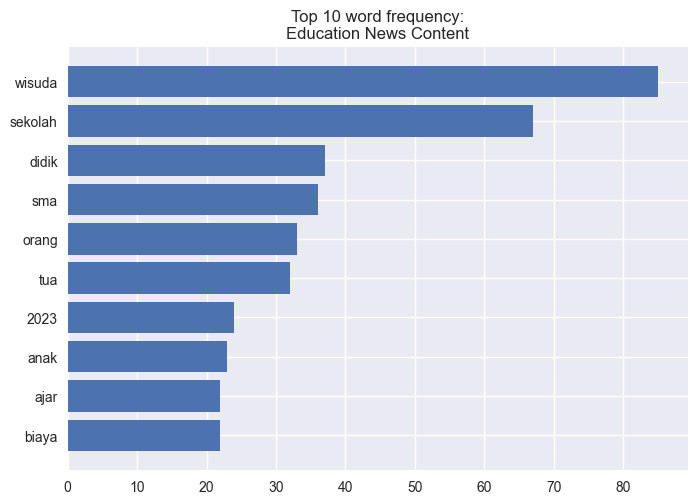

In [51]:
plt.barh(
    list(tokenized_words_count_sorted.keys())[-10:],
    list(tokenized_words_count_sorted.values())[-10:],
)

plt.title('Top 10 word frequency:\nEducation News Content')
plt.show()

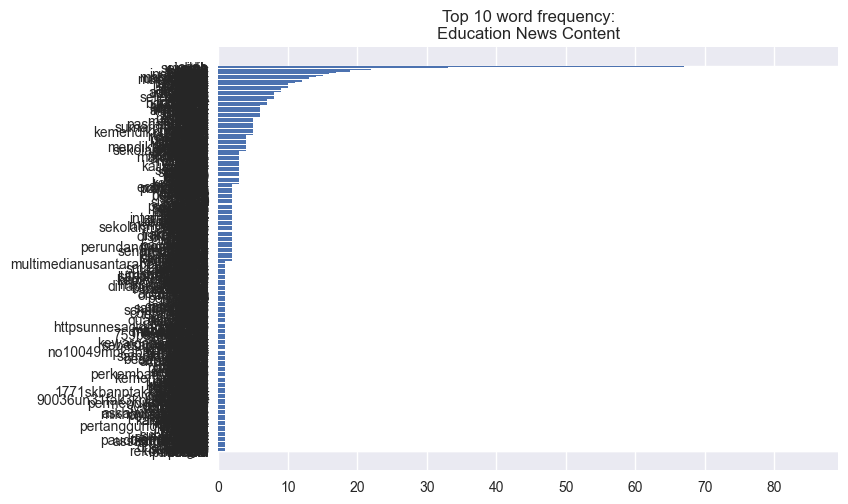

In [52]:
plt.barh(
    list(tokenized_words_count_sorted.keys())[10:],
    list(tokenized_words_count_sorted.values())[10:],
)

plt.title('Top 10 word frequency:\nEducation News Content')
plt.show()